In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt


In [20]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 1


In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#9): Which is digit '4'


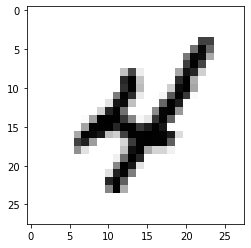

In [22]:
digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

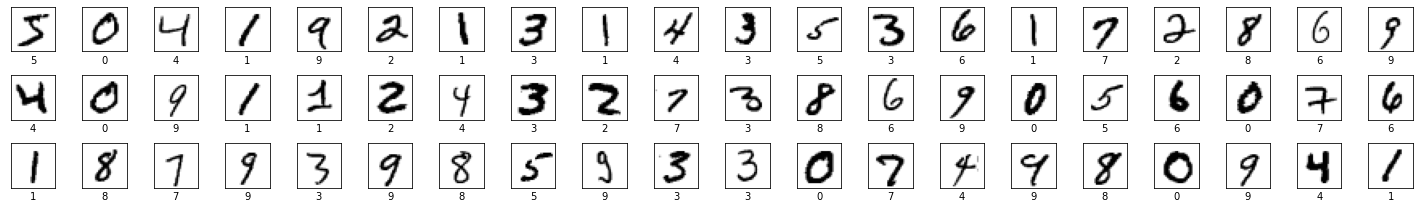

In [23]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [24]:
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)
#x_train, x_test = x_train / 255.0, x_test / 255.0   #normalized#

In [25]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [26]:
# model.compile(
#    optimizer='adam', 
#     loss='sparse_categorical_crossentropy', 
#      metrics=['accuracy']
#  )

In [27]:
# model.compile(
#    optimizer='SGD', 
#    loss='sparse_categorical_crossentropy', 
#   metrics=['accuracy']
# )

In [28]:
model.compile(
   optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [29]:

h = model.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3318 - accuracy: 0.9286 - val_loss: 0.1153 - val_accuracy: 0.9703
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0992 - accuracy: 0.9734 - val_loss: 0.0828 - val_accuracy: 0.9798
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0862 - accuracy: 0.9795 - val_loss: 0.1160 - val_accuracy: 0.9725
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0843 - accuracy: 0.9804 - val_loss: 0.1355 - val_accuracy: 0.9775
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0823 - accuracy: 0.9814 - val_loss: 0.1383 - val_accuracy: 0.9813
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0854 - accuracy: 0.9827 - val_loss: 0.1297 - val_accuracy: 0.9816
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0787 - accuracy: 0.9842 - val_loss: 0.0868 - val_accuracy:

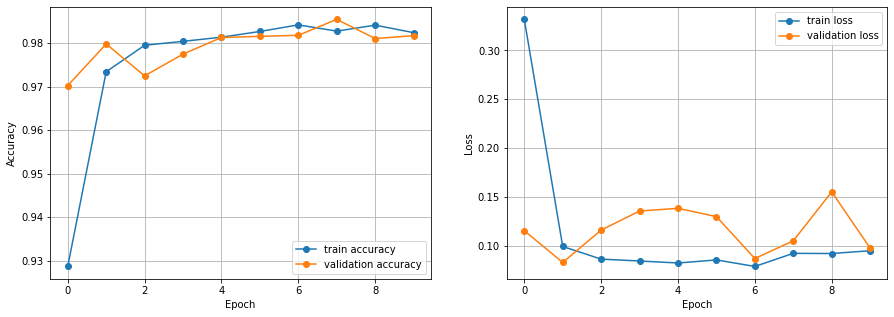

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [31]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.9838

Test Accuracy: 0.9837999939918518

Test Loss: 0.0776720941066742


In [32]:
predictions = model.predict(x_test)

In [33]:
predictions[0]

array([4.0734948e-18, 2.7603449e-12, 3.0682772e-12, 3.5245298e-14,
       1.3351114e-19, 4.7562043e-19, 1.9268643e-25, 1.0000000e+00,
       5.3329766e-20, 1.1657567e-14], dtype=float32)

In [34]:
np.argmax(predictions[0])

7

In [35]:
#reshape again to original form
x_train=x_train=x_train.reshape(-1,28,28)
x_test=x_test=x_test.reshape(-1,28,28)  #not normalized

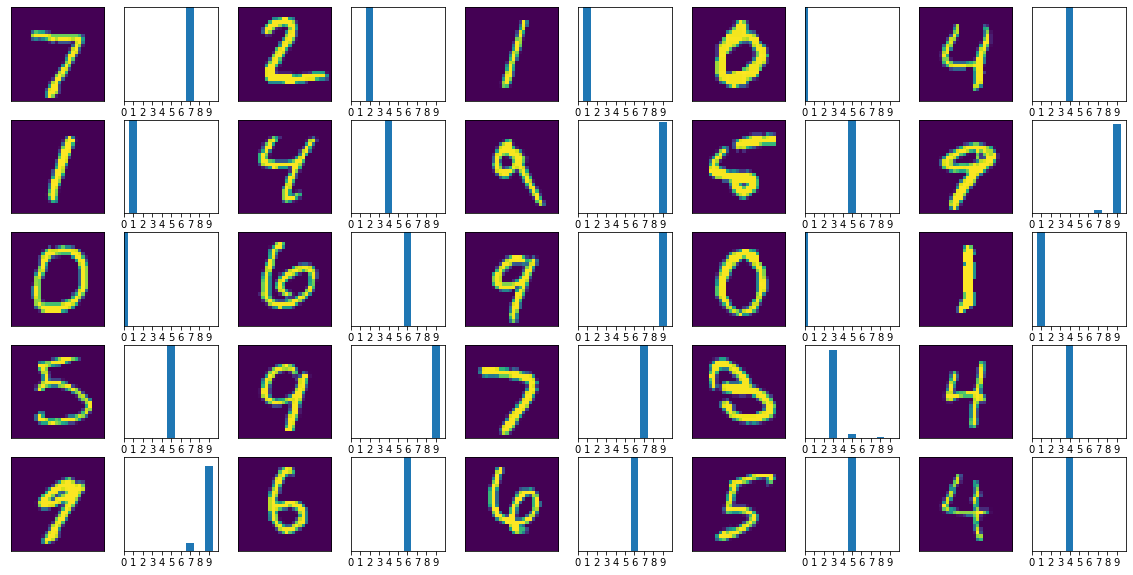

In [36]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()

**Affect of using and not using data normalization :**

By using adam with normalized we get the highest accuracy at 10th epoch is 99.58% and value_accurary is 98.83%. But without normalization we get the accuracy 99.01% and value_accuracy 98.24% at 10th epoch. So, here we can say, with normalization we get a slightly better result.
By using SGD with normalized we get the highest accuracy at 10th epoch is 98.3% and value_accurary is 97.6%. But without normalization we get the accuracy 11.4% and value_accuracy 10.6% at 10th epoch. So, here we can say, with normalization we get better result.
By using RMSProp with normalized we get the highest accuracy at 10th epoch is 99.58% and value_accurary is 98.67%. But without normalization we get the accuracy 98.24% and value_accuracy 98.18% at 10th epoch. So, here we can say, with normalization we get a slightly better result.